## Uniform prior (train2.py)

500 151.84958795903822
1000 164.30558642273363
2000 171.33818109150937


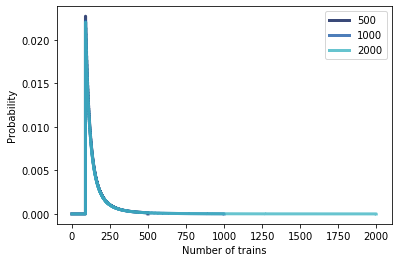

<Figure size 576x432 with 0 Axes>

In [60]:
"""This file contains code for use with "Think Bayes",
by Allen B. Downey, available from greenteapress.com

Copyright 2012 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""
from __future__ import print_function

import sys
sys.path.append("../code/")

from dice import Dice
import thinkplot

class Train(Dice):
    """The likelihood function for the train problem is the same as
    for the Dice problem."""


def Mean(suite):
    total = 0
    for hypo, prob in suite.Items():
        total += hypo * prob
    return total


def MakePosterior(high, dataset):
    hypos = range(1, high+1)
    suite = Train(hypos)
    suite.name = str(high)

    for data in dataset:
        suite.Update(data)

    thinkplot.Pmf(suite)
    return suite


def main():
    dataset = [30, 60, 90]

    for high in [500, 1000, 2000]:
        suite = MakePosterior(high, dataset)
        print(high, suite.Mean())

    thinkplot.Show(xlabel='Number of trains',
                   ylabel='Probability')
    
#     thinkplot.Save(root='train2',
#                    xlabel='Number of trains',
#                    ylabel='Probability')


if __name__ == '__main__':
    main()

### take one example

In [37]:
dataset=[60]
for high in [1000]:
    suite = MakePosterior(high, dataset)
    print(high, suite.Mean())
    for hypo, prob in suite.Items():
        print(hypo,prob)

1000 333.41989326371095
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 0.0
44 0.0
45 0.0
46 0.0
47 0.0
48 0.0
49 0.0
50 0.0
51 0.0
52 0.0
53 0.0
54 0.0
55 0.0
56 0.0
57 0.0
58 0.0
59 0.0
60 0.005905417875729855
61 0.00580860774661953
62 0.00571492052489986
63 0.0056242075006951
64 0.005536329258496739
65 0.005451154962212174
66 0.00536856170520896
67 0.005288433918564049
68 0.005210662831526343
69 0.005135145978895526
70 0.00506178675062559
71 0.004990493979490018
72 0.004921181563108212
73 0.004853768117038236
74 0.00478817665599718
75 0.004724334300583884
76 0.004662172007155148
77 0.004601624318750537
78 0.004542629135176811
79 0.00448512750055432
80 0.004429063406797391
81 0.004374383611651744
82 0.004321037470046235
83 0.0042689767776360405
84 

### manually update and check

In [39]:
dataset=[60]
for high in [1000]:
    hypos = range(1, high+1)
    suite = Train(hypos)
    suite.name = str(high)
    for data in dataset:
        # take hypo=60 for an example
        hypo=60
        print("hypo={}, data={}".format(hypo,data))
        print("prior:",suite.d[hypo])
        like=suite.Likelihood(data,hypo)
        print("likelihood:",like)
        print("updating probability with the data...")
        for h in suite.Values():
            like=suite.Likelihood(data,h)
            suite.Mult(h,like)
        print("prior*likelihood:",suite.d[hypo])
        print("normalizing...")
        suite.Normalize()
        print("posterior:",suite.d[hypo])
        print("mean of poeteriors (expectation):",Mean(suite))


hypo=60, data=60
prior: 0.001
likelihood: 0.016666666666666666
updating probability with the data...
prior*likelihood: 1.6666666666666667e-05
normalizing...
posterior: 0.005905417875729855
mean of poeteriors (expectation): 333.41989326371095


## Power-law prior (train3.py)

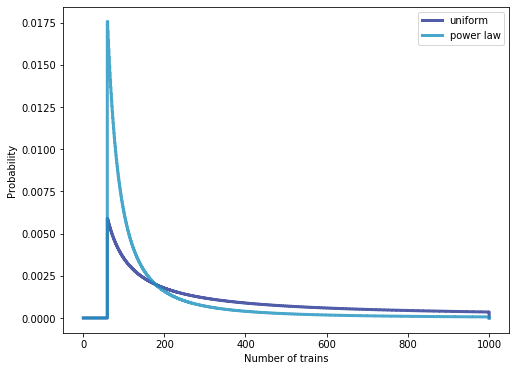

500 130.70846986256004
(91, 235)
(91, 235)
1000 133.2752313750312
(91, 242)
(91, 242)
2000 133.99746308073065
(91, 243)
(91, 243)


<Figure size 576x432 with 0 Axes>

In [59]:
"""This file contains code for use with "Think Bayes",
by Allen B. Downey, available from greenteapress.com

Copyright 2012 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""
from __future__ import print_function

import sys
sys.path.append("../code/")

import thinkbayes
import thinkplot

from thinkbayes import Pmf, Percentile
from dice import Dice


class Train(Dice):
    """Represents hypotheses about how many trains the company has."""


class Train2(Dice):
    """Represents hypotheses about how many trains the company has."""

    def __init__(self, hypos, alpha=1.0):
        """Initializes the hypotheses with a power law distribution.

        hypos: sequence of hypotheses
        alpha: parameter of the power law prior
        """
        Pmf.__init__(self)
        for hypo in hypos:
            self.Set(hypo, hypo**(-alpha))
        self.Normalize()


def MakePosterior(high, dataset, constructor):
    """Makes and updates a Suite.

    high: upper bound on the range of hypotheses
    dataset: observed data to use for the update
    constructor: function that makes a new suite

    Returns: posterior Suite
    """
    hypos = range(1, high+1)
    suite = constructor(hypos)
    suite.name = str(high)

    for data in dataset:
        suite.Update(data)

    return suite


def ComparePriors():
    """Runs the analysis with two different priors and compares them."""
    dataset = [60]
    high = 1000

    thinkplot.Clf()
    thinkplot.PrePlot(num=2)

    constructors = [Train, Train2]
    labels = ['uniform', 'power law']

    for constructor, label in zip(constructors, labels):
        suite = MakePosterior(high, dataset, constructor)
        suite.name = label
        thinkplot.Pmf(suite)

    thinkplot.Show(xlabel='Number of trains',
                   ylabel='Probability')
    
#     thinkplot.Save(root='train4',
#                 xlabel='Number of trains',
#                 ylabel='Probability')

def main():
    ComparePriors()

    dataset = [30, 60, 90]

    thinkplot.Clf()
    thinkplot.PrePlot(num=3)

    for high in [500, 1000, 2000]:
        suite = MakePosterior(high, dataset, Train2)
        print(high, suite.Mean())
    
#     thinkplot.Save(root='train3',
#                    xlabel='Number of trains',
#                    ylabel='Probability')

        interval = Percentile(suite, 5), Percentile(suite, 95)
        print(interval)

        cdf = thinkbayes.MakeCdfFromPmf(suite)
        interval = cdf.Percentile(5), cdf.Percentile(95)
        print(interval)
    

if __name__ == '__main__':
    main()

### Why power-law prior is better than uniform piror:
1. The relationship between the number of companies and the scale of the companies is more real.
2. The mean of posterior (which I think `mean` is actually `expectation`) is more close to each other given different max N.

### Two ways to describe the posterior:
1. Point estimation: mean, median or the point with max likelihood.
2. Confidence interval: (5 percentile, 95 percentile) of CDF.

    In this example, we used mean and interval.

# ex3-1
Question: Suppose the trains are from many companies instead of one, and the probability of seeing any train of any company is equal (Hence, it is more likely to see a train from a large company). Rewrite the `Likelihood` method.

In [88]:
class Train3(Dice):
    """The likelihood function for the train problem is the same as
    for the Dice problem."""
    
    def __init__(self, hypos, alpha=1.0):
        """Initializes the hypotheses with a power law distribution.

        hypos: sequence of hypotheses
        alpha: parameter of the power law prior
        """
        Pmf.__init__(self)
        for hypo in hypos:
            self.Set(hypo, 1)
#             self.Set(hypo, hypo**(-alpha))
        self.Normalize()
    
    # give a train number setting (manually).
    trains = [50,60,70,80,90,100,500,1000]

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: a list of integers of max N of different companies
        data: integer train number
        """
        if hypo < data:
            return 0
        else:
            return hypo/sum(self.trains)  # the probability of seeing any train of any company is equal
    
    def Update(self, data):
        """Updates the PMF with new data.

        data: int
        """
        for hypo in self.Values():
            like = self.Likelihood(data, hypo)
            self.Mult(hypo, like)
        self.Normalize()


def Mean(suite):
    total = 0
    for hypo, prob in suite.Items():
        total += hypo * prob
    return total
        
    
dataset = [60]
hypos = [50,60,70,80,90,100,500,1000]
suite = Train3(hypos)
print("piror:",suite.Items())
print("updating with the dataset...")
for data in dataset:
    suite.Update(data)
print("posterior:",suite.Items())
print("mean of posterior:",Mean(suite))

piror: dict_items([(50, 0.125), (60, 0.125), (70, 0.125), (80, 0.125), (90, 0.125), (100, 0.125), (500, 0.125), (1000, 0.125)])
updating with the dataset...
posterior: dict_items([(50, 0.0), (60, 0.031578947368421054), (70, 0.0368421052631579), (80, 0.04210526315789474), (90, 0.04736842105263159), (100, 0.052631578947368425), (500, 0.2631578947368421), (1000, 0.5263157894736842)])
mean of posterior: 675.2631578947368


 - we can see that after updating with data 60, the posterior of 1000 is the largest, which confirms our experience that train from the company with more trains is more likely to be seen.
 - The mean of posterior also changed. Without this setting, the mean of posterior is around 160, now it is 675.
     - 675 is the result under the uniform prior. 
     - With the 1-order power-law prior, the mean is about 271.